In [1]:
import pandas
import pycaret

In [2]:
filename = "Data_v2_N150.csv"

In [3]:
csv = pandas.read_csv(filename)
csv = csv.dropna(axis=0).reset_index(drop=True)#drop NaN

#csv = csv.drop('Lmt',axis=1)
csv = csv.drop('Lmr',axis=1)
csv = csv.drop('Llk',axis=1)
csv = csv.drop('Rt',axis=1)
csv = csv.drop('Rr',axis=1)

dataset = csv
dataset

,N1,N2,space1,space2,l1,l2,h1,w1,Lmt
0,2,8,15,36,9,78,115,81,0.062433
1,8,1,26,37,30,62,164,153,4.874495
2,8,8,10,22,22,42,168,77,2.011024
3,5,5,12,48,19,83,168,140,1.051320
4,9,3,37,50,30,78,199,42,1.436817
...,...,...,...,...,...,...,...,...,...
145,1,9,9,23,11,75,187,78,0.013720
146,7,7,13,49,44,82,141,155,5.239963
147,9,7,11,21,23,76,146,161,5.256026
148,5,6,22,45,21,71,113,191,2.071572


In [4]:
data = dataset.sample(frac=0.7, random_state=786).reset_index(drop=True)
data_unseen = dataset.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (105, 9)
Unseen Data For Predictions: (45, 9)


In [5]:
from pycaret.regression import *
exp_reg101 = setup(data = data, target = 'Lmt', session_id=123) 

,Description,Value
0,session_id,123
1,Target,Lmt
2,Original Data,"(105, 9)"
3,Missing Values,False
4,Numeric Features,6
5,Categorical Features,2
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(73, 24)"


In [6]:
top3 = compare_models(n_select = 3) 

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,0.8356,1.2301,1.0430,0.6581,0.3779,5.4207,0.0060
br,Bayesian Ridge,0.8318,1.2119,1.0382,0.6556,0.3774,5.4602,0.0060
lr,Linear Regression,0.8334,1.1635,1.0327,0.6322,0.3820,5.6933,0.7770
lar,Least Angle Regression,0.8334,1.1639,1.0329,0.6319,0.3821,5.6937,0.0080
huber,Huber Regressor,0.9538,1.5562,1.1798,0.5542,0.4288,6.5470,0.0150
gbr,Gradient Boosting Regressor,0.9100,1.7276,1.1958,0.5416,0.3722,2.4304,0.0160
et,Extra Trees Regressor,0.8665,1.9300,1.2411,0.4564,0.3759,1.0278,0.0710
rf,Random Forest Regressor,1.1149,2.4428,1.4563,0.3552,0.4664,3.5316,0.0880
ada,AdaBoost Regressor,1.2149,2.5565,1.5301,0.3180,0.5172,6.2700,0.0340
knn,K Neighbors Regressor,1.2381,2.9180,1.6083,0.1901,0.5356,6.6713,0.0110


In [7]:
tuned_top3 = [tune_model(i) for i in top3]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.7361,0.8709,0.9332,0.2596,0.3548,9.3978
1,0.6611,0.8521,0.9231,0.8092,0.3227,3.3381
2,1.1336,1.4160,1.1900,0.7483,0.3840,3.2314
3,1.0546,1.8144,1.3470,0.6994,0.3582,3.0552
4,0.7580,1.4407,1.2003,0.4653,0.4577,3.0655
5,0.5472,0.3820,0.6180,0.7279,0.2589,2.3000
6,0.3999,0.1968,0.4436,0.9242,0.2065,4.0813
7,0.6633,0.8147,0.9026,0.8516,0.4225,21.0368
8,1.0770,1.7062,1.3062,0.0893,0.5728,5.6230
9,1.3032,2.1409,1.4632,0.7467,0.4823,1.8036


In [8]:
bagged_top3 = [ensemble_model(i) for i in tuned_top3]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.6767,0.6864,0.8285,0.4164,0.3251,9.3604
1,0.6835,0.7259,0.8520,0.8374,0.3105,3.4995
2,1.1363,1.4298,1.1958,0.7459,0.3854,2.8555
3,1.1108,1.9075,1.3811,0.6840,0.3303,2.5528
4,0.6311,1.4031,1.1845,0.4793,0.4228,2.1696
5,0.5953,0.4732,0.6879,0.6630,0.2818,2.4103
6,0.4216,0.2349,0.4847,0.9095,0.2199,3.8515
7,0.6157,0.6737,0.8208,0.8773,0.3905,18.7627
8,0.9619,1.3173,1.1477,0.2969,0.5506,5.0662
9,1.4795,2.8063,1.6752,0.6680,0.5876,2.3538


In [9]:
blender = blend_models(estimator_list = top3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.6716,0.7643,0.8742,0.3502,0.3300,8.8529
1,0.6851,0.6916,0.8316,0.8451,0.3207,3.0707
2,1.1146,1.4350,1.1979,0.7450,0.3630,3.0445
3,1.0100,1.7710,1.3308,0.7066,0.3160,3.6405
4,0.7339,1.1683,1.0809,0.5664,0.4472,3.4349
5,0.4990,0.3374,0.5808,0.7597,0.2096,1.0219
6,0.3791,0.2132,0.4617,0.9179,0.2171,4.6941
7,0.6957,0.9445,0.9719,0.8280,0.4083,19.7250
8,0.9950,1.5139,1.2304,0.1919,0.5607,5.3454
9,1.4389,2.8541,1.6894,0.6624,0.5694,2.2405


In [10]:
best5 = automl(optimize = 'RMSE')

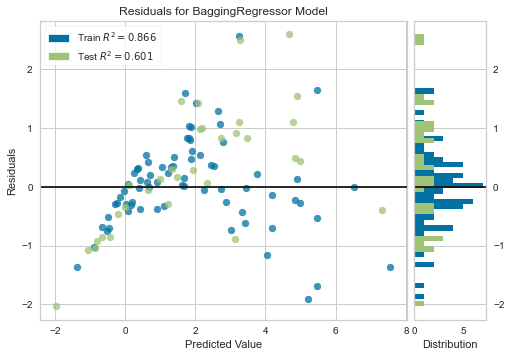

In [11]:
plot_model(best5)

In [12]:
best5

BaggingRegressor(base_estimator=BayesianRidge(alpha_1=0.1, alpha_2=0.1,
                                              alpha_init=None,
                                              compute_score=True, copy_X=True,
                                              fit_intercept=True, lambda_1=0.01,
                                              lambda_2=1e-06, lambda_init=None,
                                              n_iter=300, normalize=True,
                                              tol=0.001, verbose=False),
                 bootstrap=True, bootstrap_features=False, max_features=1.0,
                 max_samples=1.0, n_estimators=10, n_jobs=None, oob_score=False,
                 random_state=123, verbose=0, warm_start=False)

In [13]:
parm = [[26,54,74,51]]

sol = ML_model_v2_num1.predict(parm)
solution1 = best1.predict(parm)
solution2 = best2.predict(parm)
solution3 = best3.predict(parm)
solution4 = best4.predict(parm)
solution5 = best5.predict(parm)
f',{solution1[0]},{solution2[0]},{solution3[0]},{solution4[0]},{solution5[0]},0,0,0,0,0'


NameError: name 'ML_model_v2_num1' is not defined

In [2]:
# import ML data
import pandas
import pycaret

from pycaret.regression import load_model


ML_model_v2_num1 = load_model("ML_model_v2_num1")

Transformation Pipeline and Model Successfully Loaded
